In [2]:
import numpy as np 
import pandas as pd 
import time



from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


from sklearn import tree
from xgboost import XGBClassifier


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Esto es para acceder al directorio de arcgivos de Kaggle
# No hace falta correrlo si se tienen los datos en forma local
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/this-week-in-chess-archive/twic_master.csv
/kaggle/input/this-week-in-chess-archive/twic_master.parquet
/kaggle/input/this-week-in-chess-archive/metadata.csv
/kaggle/input/this-week-in-chess-archive/pgns/twic1032.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1351.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1167.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1452.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic963.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1027.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1179.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1133.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1176.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1442.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1279.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1342.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1069.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1195.pgn
/ka

In [4]:
# llamo al archivo "twic_master.csv" y creo el dataframe
df = pd.read_csv('/kaggle/input/this-week-in-chess-archive/twic_master.csv')


# esto es para que muestre todas las columnas del df
pd.set_option('display.max_columns', None) 

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (10,13,14,23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head(5)

twic_number           White       Black        Date   EventDate  \
0         1260       Tukhaev,A   Carlsen,M  2018-12-26  2018.12.26   
1         1260     Nakamura,Hi     Teske,H  2018-12-26  2018.12.26   
2         1260          Tari,A  Artemiev,V  2018-12-26  2018.12.26   
3         1260    Fedoseev,Vl3  Tregubov,P  2018-12-26  2018.12.26   
4         1260  Hovhannisyan,R   Aronian,L  2018-12-26  2018.12.26   

              Event   Result  \
0  World Rapid 2018      1-0   
1  World Rapid 2018      1-0   
2  World Rapid 2018      0-1   
3  World Rapid 2018  1/2-1/2   
4  World Rapid 2018      1-0   

                                      mainline_moves               Site  \
0  1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...  St Petersburg RUS   
1  1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...  St Petersburg RUS   
2  1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...  St Petersburg RUS   
3  1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...  St Petersburg RUS   
4  1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...  St Petersburg RUS   

   Online Round  ECO           Opening WhiteFideId BlackFideId  WhiteElo  \
0   False   1.1  B33          Sicilian  14109476.0   1503014.0    2527.0   
1   False   1.2  A05      Reti opening   2016192.0   4611500.0    2746.0   
2   False   1.3  B52          Sicilian   1510045.0  24101605.0    2620.0   
3   False   1.4  C42  Petrov's defence  24130737.0   4115341.0    2719.0   
4   False   1.5  B06  Robatsch defence  13302507.0  13300474.0    2637.0   

   BlackElo                       Variation WhiteTitle BlackTitle WhiteTeam  \
0    2835.0  Pelikan, Chelyabinsk variation         GM         GM       NaN   
1    2483.0                             NaN         GM         GM       NaN   
2    2709.0  Canal-Sokolsky attack, 3...Bd7         GM         GM       NaN   
3    2592.0                             NaN         GM         GM       NaN   
4    2765.0  two knights, Suttles variation         GM         GM       NaN   

  BlackTeam EventType  FEN  SetUp Variant  Board  PlyCount  EventCategory  
0       NaN       NaN  NaN    NaN     NaN    NaN       NaN            NaN  
1       NaN       NaN  NaN    NaN     NaN    NaN       NaN            NaN  
2       NaN       NaN  NaN    NaN     NaN    NaN       NaN            NaN  
3       NaN       NaN  NaN    NaN     NaN    NaN       NaN            NaN  
4       NaN       NaN  NaN    NaN     NaN    NaN       NaN            NaN

In [6]:
# Casi 2 millones de partidas
df.shape

(1971319, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971319 entries, 0 to 1971318
Data columns (total 29 columns):
 #   Column          Dtype  
---  ------          -----  
 0   twic_number     int64  
 1   White           object 
 2   Black           object 
 3   Date            object 
 4   EventDate       object 
 5   Event           object 
 6   Result          object 
 7   mainline_moves  object 
 8   Site            object 
 9   Online          bool   
 10  Round           object 
 11  ECO             object 
 12  Opening         object 
 13  WhiteFideId     object 
 14  BlackFideId     object 
 15  WhiteElo        float64
 16  BlackElo        float64
 17  Variation       object 
 18  WhiteTitle      object 
 19  BlackTitle      object 
 20  WhiteTeam       object 
 21  BlackTeam       object 
 22  EventType       object 
 23  FEN             object 
 24  SetUp           float64
 25  Variant         object 
 26  Board           float64
 27  PlyCount        float64
 28  EventCategor

In [8]:
df[~df.Variant.isnull()]

twic_number                 White                 Black        Date  \
18737           1335             Guliyev,N             Edouard,R  2020-05-25   
18738           1335             Edouard,R             Guliyev,N  2020-05-25   
18753           1335  Maurizzi,Marc Andria             Guliyev,N  2020-06-04   
18754           1335             Guliyev,N  Maurizzi,Marc Andria  2020-06-04   
18813           1335             Kuzubov,Y             Eljanov,P  2020-06-04   
...              ...                   ...                   ...         ...   
1949645         1401             Aronian,L     Dominguez Perez,L  2021-09-10   
1949646         1401             Caruana,F           Shankland,S  2021-09-10   
1949647         1401             Svidler,P          Mamedyarov,S  2021-09-10   
1949648         1401           Nakamura,Hi                  So,W  2021-09-10   
1949649         1401     Vachier Lagrave,M            Kasparov,G  2021-09-10   

          EventDate                      Event   Result  \
18737    2020.05.25     C'Chartres Showmatch 1  1/2-1/2   
18738    2020.05.25     C'Chartres Showmatch 1      0-1   
18753    2020.06.04     C'Chartres Showmatch 3  1/2-1/2   
18754    2020.06.04     C'Chartres Showmatch 3  1/2-1/2   
18813    2020.06.04  Gladiators FR June 4 2020      1-0   
...             ...                        ...      ...   
1949645  2021.09.08     Champions Showdown 9LX      0-1   
1949646  2021.09.08     Champions Showdown 9LX  1/2-1/2   
1949647  2021.09.08     Champions Showdown 9LX      1-0   
1949648  2021.09.08     Champions Showdown 9LX  1/2-1/2   
1949649  2021.09.08     Champions Showdown 9LX      1-0   

                                            mainline_moves               Site  \
18737    1. e4 g5 2. Ne3 e6 3. d4 d5 4. e5 c5 5. c3 Nc6...  Europe-Echecs INT   
18738    1. e4 e5 2. Ng3 f6 3. f3 Be6 4. Nh5 O-O 5. f4 ...  Europe-Echecs INT   
18753    1. f4 c5 2. g3 f5 3. c4 Be6 4. Nb3 b6 5. d4 cx...  Europe-Echecs INT   
18754                                                  NaN  Europe-Echecs INT   
18813    1. d4 d5 2. c3 Nd6 3. h3 f6 4. Bh2 Bf7 5. O-O ...      chess.com INT   
...                                                    ...                ...   
1949645  1. e4 e5 2. c3 Ne6 3. Nf3 g6 4. Ng3 d6 5. O-O ...    Saint Louis USA   
1949646  1. e4 Nf6 2. c3 e5 3. g4 h6 4. d4 d6 5. Ne3 h5...    Saint Louis USA   
1949647  1. e4 g6 2. c3 c5 3. g3 d6 4. Ne3 Nf6 5. f4 Ng...    Saint Louis USA   
1949648  1. g3 g6 2. c3 c6 3. d4 d5 4. Nd3 Nd6 5. Bf4 g...    Saint Louis USA   
1949649  1. g4 h5 2. g5 g6 3. c3 c6 4. e4 c5 5. d3 Ne6 ...    Saint Louis USA   

         Online Round  ECO Opening WhiteFideId BlackFideId  WhiteElo  \
18737      True     3  NaN     NaN  13400363.0    633429.0    2529.0   
18738      True     4  NaN     NaN    633429.0  13400363.0    2649.0   
18753      True     3  NaN     NaN  36083534.0  13400363.0    2433.0   
18754      True     4  NaN     NaN  13400363.0  36083534.0    2529.0   
18813      True     1  NaN     NaN  14112906.0  14102951.0    2643.0   
...         ...   ...  ...     ...         ...         ...       ...   
1949645   False   9.1  NaN     NaN  13300474.0   3503240.0    2782.0   
1949646   False   9.2  NaN     NaN   2020009.0   2004887.0    2800.0   
1949647   False   9.3  NaN     NaN   4102142.0  13401319.0    2701.0   
1949648   False   9.4  NaN     NaN   2016192.0   5202213.0    2736.0   
1949649   False   9.5  NaN     NaN    623539.0   4100018.0    2763.0   

         BlackElo Variation WhiteTitle BlackTitle WhiteTeam BlackTeam  \
18737      2649.0       NaN         GM         GM       NaN       NaN   
18738      2529.0       NaN         GM         GM       NaN       NaN   
18753      2529.0       NaN         IM         GM       NaN       NaN   
18754      2433.0       NaN         GM         IM       NaN       NaN   
18813      2672.0       NaN         GM         GM       NaN       NaN   
...           ...       ...        ...        ...       ...    

In [9]:
df[~df.FEN.isna()]

twic_number                 White                 Black        Date  \
18737           1335             Guliyev,N             Edouard,R  2020-05-25   
18738           1335             Edouard,R             Guliyev,N  2020-05-25   
18753           1335  Maurizzi,Marc Andria             Guliyev,N  2020-06-04   
18754           1335             Guliyev,N  Maurizzi,Marc Andria  2020-06-04   
18813           1335             Kuzubov,Y             Eljanov,P  2020-06-04   
...              ...                   ...                   ...         ...   
1949645         1401             Aronian,L     Dominguez Perez,L  2021-09-10   
1949646         1401             Caruana,F           Shankland,S  2021-09-10   
1949647         1401             Svidler,P          Mamedyarov,S  2021-09-10   
1949648         1401           Nakamura,Hi                  So,W  2021-09-10   
1949649         1401     Vachier Lagrave,M            Kasparov,G  2021-09-10   

          EventDate                      Event   Result  \
18737    2020.05.25     C'Chartres Showmatch 1  1/2-1/2   
18738    2020.05.25     C'Chartres Showmatch 1      0-1   
18753    2020.06.04     C'Chartres Showmatch 3  1/2-1/2   
18754    2020.06.04     C'Chartres Showmatch 3  1/2-1/2   
18813    2020.06.04  Gladiators FR June 4 2020      1-0   
...             ...                        ...      ...   
1949645  2021.09.08     Champions Showdown 9LX      0-1   
1949646  2021.09.08     Champions Showdown 9LX  1/2-1/2   
1949647  2021.09.08     Champions Showdown 9LX      1-0   
1949648  2021.09.08     Champions Showdown 9LX  1/2-1/2   
1949649  2021.09.08     Champions Showdown 9LX      1-0   

                                            mainline_moves               Site  \
18737    1. e4 g5 2. Ne3 e6 3. d4 d5 4. e5 c5 5. c3 Nc6...  Europe-Echecs INT   
18738    1. e4 e5 2. Ng3 f6 3. f3 Be6 4. Nh5 O-O 5. f4 ...  Europe-Echecs INT   
18753    1. f4 c5 2. g3 f5 3. c4 Be6 4. Nb3 b6 5. d4 cx...  Europe-Echecs INT   
18754                                                  NaN  Europe-Echecs INT   
18813    1. d4 d5 2. c3 Nd6 3. h3 f6 4. Bh2 Bf7 5. O-O ...      chess.com INT   
...                                                    ...                ...   
1949645  1. e4 e5 2. c3 Ne6 3. Nf3 g6 4. Ng3 d6 5. O-O ...    Saint Louis USA   
1949646  1. e4 Nf6 2. c3 e5 3. g4 h6 4. d4 d6 5. Ne3 h5...    Saint Louis USA   
1949647  1. e4 g6 2. c3 c5 3. g3 d6 4. Ne3 Nf6 5. f4 Ng...    Saint Louis USA   
1949648  1. g3 g6 2. c3 c6 3. d4 d5 4. Nd3 Nd6 5. Bf4 g...    Saint Louis USA   
1949649  1. g4 h5 2. g5 g6 3. c3 c6 4. e4 c5 5. d3 Ne6 ...    Saint Louis USA   

         Online Round  ECO Opening WhiteFideId BlackFideId  WhiteElo  \
18737      True     3  NaN     NaN  13400363.0    633429.0    2529.0   
18738      True     4  NaN     NaN    633429.0  13400363.0    2649.0   
18753      True     3  NaN     NaN  36083534.0  13400363.0    2433.0   
18754      True     4  NaN     NaN  13400363.0  36083534.0    2529.0   
18813      True     1  NaN     NaN  14112906.0  14102951.0    2643.0   
...         ...   ...  ...     ...         ...         ...       ...   
1949645   False   9.1  NaN     NaN  13300474.0   3503240.0    2782.0   
1949646   False   9.2  NaN     NaN   2020009.0   2004887.0    2800.0   
1949647   False   9.3  NaN     NaN   4102142.0  13401319.0    2701.0   
1949648   False   9.4  NaN     NaN   2016192.0   5202213.0    2736.0   
1949649   False   9.5  NaN     NaN    623539.0   4100018.0    2763.0   

         BlackElo Variation WhiteTitle BlackTitle WhiteTeam BlackTeam  \
18737      2649.0       NaN         GM         GM       NaN       NaN   
18738      2529.0       NaN         GM         GM       NaN       NaN   
18753      2529.0       NaN         IM         GM       NaN       NaN   
18754      2433.0       NaN         GM         IM       NaN       NaN   
18813      2672.0       NaN         GM         GM       NaN       NaN   
...           ...       ...        ...        ...       ...    

In [10]:
df[~df.SetUp.isna()]

twic_number                 White                 Black        Date  \
18737           1335             Guliyev,N             Edouard,R  2020-05-25   
18738           1335             Edouard,R             Guliyev,N  2020-05-25   
18753           1335  Maurizzi,Marc Andria             Guliyev,N  2020-06-04   
18754           1335             Guliyev,N  Maurizzi,Marc Andria  2020-06-04   
18813           1335             Kuzubov,Y             Eljanov,P  2020-06-04   
...              ...                   ...                   ...         ...   
1949645         1401             Aronian,L     Dominguez Perez,L  2021-09-10   
1949646         1401             Caruana,F           Shankland,S  2021-09-10   
1949647         1401             Svidler,P          Mamedyarov,S  2021-09-10   
1949648         1401           Nakamura,Hi                  So,W  2021-09-10   
1949649         1401     Vachier Lagrave,M            Kasparov,G  2021-09-10   

          EventDate                      Event   Result  \
18737    2020.05.25     C'Chartres Showmatch 1  1/2-1/2   
18738    2020.05.25     C'Chartres Showmatch 1      0-1   
18753    2020.06.04     C'Chartres Showmatch 3  1/2-1/2   
18754    2020.06.04     C'Chartres Showmatch 3  1/2-1/2   
18813    2020.06.04  Gladiators FR June 4 2020      1-0   
...             ...                        ...      ...   
1949645  2021.09.08     Champions Showdown 9LX      0-1   
1949646  2021.09.08     Champions Showdown 9LX  1/2-1/2   
1949647  2021.09.08     Champions Showdown 9LX      1-0   
1949648  2021.09.08     Champions Showdown 9LX  1/2-1/2   
1949649  2021.09.08     Champions Showdown 9LX      1-0   

                                            mainline_moves               Site  \
18737    1. e4 g5 2. Ne3 e6 3. d4 d5 4. e5 c5 5. c3 Nc6...  Europe-Echecs INT   
18738    1. e4 e5 2. Ng3 f6 3. f3 Be6 4. Nh5 O-O 5. f4 ...  Europe-Echecs INT   
18753    1. f4 c5 2. g3 f5 3. c4 Be6 4. Nb3 b6 5. d4 cx...  Europe-Echecs INT   
18754                                                  NaN  Europe-Echecs INT   
18813    1. d4 d5 2. c3 Nd6 3. h3 f6 4. Bh2 Bf7 5. O-O ...      chess.com INT   
...                                                    ...                ...   
1949645  1. e4 e5 2. c3 Ne6 3. Nf3 g6 4. Ng3 d6 5. O-O ...    Saint Louis USA   
1949646  1. e4 Nf6 2. c3 e5 3. g4 h6 4. d4 d6 5. Ne3 h5...    Saint Louis USA   
1949647  1. e4 g6 2. c3 c5 3. g3 d6 4. Ne3 Nf6 5. f4 Ng...    Saint Louis USA   
1949648  1. g3 g6 2. c3 c6 3. d4 d5 4. Nd3 Nd6 5. Bf4 g...    Saint Louis USA   
1949649  1. g4 h5 2. g5 g6 3. c3 c6 4. e4 c5 5. d3 Ne6 ...    Saint Louis USA   

         Online Round  ECO Opening WhiteFideId BlackFideId  WhiteElo  \
18737      True     3  NaN     NaN  13400363.0    633429.0    2529.0   
18738      True     4  NaN     NaN    633429.0  13400363.0    2649.0   
18753      True     3  NaN     NaN  36083534.0  13400363.0    2433.0   
18754      True     4  NaN     NaN  13400363.0  36083534.0    2529.0   
18813      True     1  NaN     NaN  14112906.0  14102951.0    2643.0   
...         ...   ...  ...     ...         ...         ...       ...   
1949645   False   9.1  NaN     NaN  13300474.0   3503240.0    2782.0   
1949646   False   9.2  NaN     NaN   2020009.0   2004887.0    2800.0   
1949647   False   9.3  NaN     NaN   4102142.0  13401319.0    2701.0   
1949648   False   9.4  NaN     NaN   2016192.0   5202213.0    2736.0   
1949649   False   9.5  NaN     NaN    623539.0   4100018.0    2763.0   

         BlackElo Variation WhiteTitle BlackTitle WhiteTeam BlackTeam  \
18737      2649.0       NaN         GM         GM       NaN       NaN   
18738      2529.0       NaN         GM         GM       NaN       NaN   
18753      2529.0       NaN         IM         GM       NaN       NaN   
18754      2433.0       NaN         GM         IM       NaN       NaN   
18813      2672.0       NaN         GM         GM       NaN       NaN   
...           ...       ...        ...        ...       ...    

Las columnas SetUp, FEN y Variant cuando no son nulas hacen referencia a la modalidad chess960. Voy a dropear los registros de esta modalidad, son alrededor de 550 partidas.

Las columnas PlyCount, Board, EventCategory, BlackTeam y WhiteTeam no me aportan nada interesante. Las primeras tres son casi todas nulas, y los equipos no interesan.

In [11]:
# Tiro las columnas que no interesan
df = df.drop(["PlyCount", "Board", "EventCategory", "BlackTeam", "WhiteTeam"], axis=1)

In [12]:
# Primero me quedo solo con los registros nulos en las columnas relacionadas con la modalidad 960
# De este modo me voy a quedar con las partidas que NO son 960chess
df = df[ (df.Variant.isna()) & (df.FEN.isna()) & (df.SetUp.isna()) ]

# Despues tiro estas columnas que ya no me dicen nada
df = df.drop(["Variant", "FEN", "SetUp"], axis=1)

In [13]:
display(df.shape)
df.columns

(1970769, 21)

Index(['twic_number', 'White', 'Black', 'Date', 'EventDate', 'Event', 'Result',
       'mainline_moves', 'Site', 'Online', 'Round', 'ECO', 'Opening',
       'WhiteFideId', 'BlackFideId', 'WhiteElo', 'BlackElo', 'Variation',
       'WhiteTitle', 'BlackTitle', 'EventType'],
      dtype='object')

In [14]:
# Vamos a poner todas las letras en minuscula y eliminar espacios en los extremos
# En "mainline_moves" y "ECO" NO toco las mayúsculas ya tienen relevancia en la notación.
cols = ["White", "Black", "Event", "Site", "Opening", "Variation", "WhiteTitle", "BlackTitle", "EventType"]
for feature in cols:
    
    df[feature] = df[feature].str.lower().str.strip()


In [15]:
# Parece que son todas blitz y rapidas. No parece haber ni clasicas, ni bullet.
display(df.EventType.value_counts())
# Pero hay muchos nulos (90%)
print("\nPrevalencia de nulos")
df.EventType.isna().value_counts(normalize=True)

team                  80971
swiss                 54121
blitz                 17099
team-tourn             9879
tourn                  9488
rapid                  7267
team-swiss             3788
k.o.                   2977
swiss (blitz)          2188
k.o. blitz              915
swiss (rapid)           485
team-match              400
team-tourn (rapid)      362
match                   334
schev                   320
match (blitz)           207
tourn (rapid)           197
tourn (blitz)           197
match (rapid)           158
k.o. (blitz)            150
team-swiss (rapid)      112
team (rapid)            109
team-match (blitz)       94
tourn (corr)             91
team-                    80
team-schev (blitz)       64
schev (rapid)            64
schev (blitz)            40
team-schev (rapid)       32
team-match (rapid)       22
k.o. rapid               17
team-k.o.                16
simul                    15
game (blitz)              1
game                      1
Name: EventType, dty


Prevalencia de nulos


True     0.902444
False    0.097556
Name: EventType, dtype: float64

In [16]:
# Vamos a ver el evento que invita, a ver si podemos asegurarnos que sólo hay partidas rápidas:
# Por ejemplo el torneo de candidatos, el tata steel, la sinquefiels cup de st louis, o los grand prix son a tiempo clásico, veamos si están:
df[(df.Event.str.contains("candidates")) | (df.Event.str.contains("sinquefield")) | (df.Event.str.contains("tata")) | (df.Event.str.contains("grand prix"))]

twic_number             White            Black        Date  \
35524            949         aronian,l       van wely,l  2013-01-12   
35525            949         carlsen,m        caruana,f  2013-01-12   
35526            949     harikrishna,p           giri,a  2013-01-12   
35527            949           anand,v      nakamura,hi  2013-01-12   
35528            949      sokolov,ivan         wang hao  2013-01-12   
...              ...               ...              ...         ...   
1957204         1315     van dael,siem      vogel,roven  2020-01-20   
1957205         1315     slingerland,f          akash,g  2020-01-20   
1957206         1315         beukema,s        pijpers,a  2020-01-20   
1957207         1315     de boer,eelke       zwirs,nico  2020-01-20   
1957208         1315  suleymanli,aydin  beerdsen,thomas  2020-01-20   

          EventDate                      Event   Result  \
35524    2013.01.12        75th tata steel gpa  1/2-1/2   
35525    2013.01.12        75th tata steel gpa  1/2-1/2   
35526    2013.01.12        75th tata steel gpa      1-0   
35527    2013.01.12        75th tata steel gpa  1/2-1/2   
35528    2013.01.12        75th tata steel gpa  1/2-1/2   
...             ...                        ...      ...   
1957204  2020.01.17  82nd tata steel qualifier      1-0   
1957205  2020.01.17  82nd tata steel qualifier      0-1   
1957206  2020.01.17  82nd tata steel qualifier      0-1   
1957207  2020.01.17  82nd tata steel qualifier      0-1   
1957208  2020.01.17  82nd tata steel qualifier  1/2-1/2   

                                            mainline_moves              Site  \
35524    1. d4 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. Nf3 ...  wijk aan zee ned   
35525    1. c4 g6 2. e4 e5 3. Nc3 Bg7 4. g3 d6 5. Nge2 ...  wijk aan zee ned   
35526    1. e4 e6 2. d4 d5 3. Nc3 dxe4 4. Nxe4 Nd7 5. N...  wijk aan zee ned   
35527    1. e4 e6 2. d4 d5 3. Nc3 Nf6 4. e5 Nfd7 5. f4 ...  wijk aan zee ned   
35528    1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. e3 O-O 5. Bd3...  wijk aan zee ned   
...                                                    ...               ...   
1957204  1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...  wijk aan zee ned   
1957205  1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...  wijk aan zee ned   
1957206  1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Qxd4 Nc6 5. B...  wijk aan zee ned   
1957207  1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...  wijk aan zee ned   
1957208  1. d4 Nf6 2. c4 g6 3. g3 Bg7 4. Bg2 O-O 5. Nc3...  wijk aan zee ned   

         Online Round  ECO                        Opening WhiteFideId  \
35524     False   1.1  E90                  king's indian  13300474.0   
35525     False   1.2  A10                        english   1503014.0   
35526     False   1.3  C10                         french   5007003.0   
35527     False   1.4  C11                         french   5000017.0   
35528     False   1.5  E52                   nimzo-indian  14400030.0   
...         ...   ...  ...                            ...         ...   
1957204   False   4.1  B56                       sicilian   1049771.0   
1957205   False   4.2  B58                       sicilian   1002473.0   
1957206   False   4.3  B53  sicilian, chekhover variation   1024523.0   
1957207   False   4.4  B56                       sicilian   1048120.0   
1957208   False   4.5  E69                  king's indian  13413937.0   

        BlackFideId  WhiteElo  BlackElo                        Variation  \
35524     1000268.0    2802.0    2679.0                            5.nf3   
35525     2020009.0    2861.0    2781.0                  adorjan defence   
35526    24116068.0    2698.0    2720.0             rubinstein variation   
35527     2016192.0    2772.0    2769.0  steinitz, boleslavsky variation   
35528     8602883.0    2663.0    2752.0       4.e3, main line with ...b6   
...             ...       ...       ...                              ...   
1957204  12908088.0    2252.0    2465.0                              NaN   
1

In [17]:
# Están todas las partidas. Sólo que las clasicas tienen "EventType"= nan
# Habría que separar en clásicas, rápidas y blitz.
# Me parece más interesante de analizar la rápidas y blitz, ya que va a haber
# menor porcentaje de empates.

In [18]:
display(df.Event.value_counts())


pro league group stage              7861
ch-fra blitz online qual            4900
djerba women online 2020            4651
world youth u16 olympiad            4275
44th olympiad 2022                  4070
                                    ... 
lviv vs odessa euromaidan m 2014       1
122nd us open armageddon               1
9th bilbao living chess                1
us chess masters tb 2018               1
7th gashimov mem tb                    1
Name: Event, Length: 11148, dtype: int64

In [19]:
# Los títulos más comunes son gran maestro, maestro internacional, maetro fide y candidato a maestro fide, tanto para hombre como para mujeres.
df.WhiteTitle.value_counts()


gm        413226
im        308241
fm        291917
cm         56723
wfm        50710
wim        46374
wgm        39028
wcm        13825
wc           428
wf           356
nm           222
agm           41
sim           40
              34
aim           23
iv            18
mf            15
afm           14
v             12
iii           12
i             10
mc             8
1              7
mk             5
ii             4
vk             4
fc             4
â              2
i++            1
423947         1
411779         1
cn             1
2              1
--             1
Name: WhiteTitle, dtype: int64

In [20]:
# Quedémonos sólo con los títulos más comunes

#titulos = ["gm", "im", "fm", "cm", "wfm", "wim", "wgm", "wcm"]

#df = df[(df.WhiteTitle.isin(titulos)) & (df.BlackTitle.isin(titulos))]

#df.shape # Los registros se me van a la mitad

In [21]:
# Donde se jugo
df.Site.value_counts().head(50)

chess.com int          378763
lichess.org int         66776
st petersburg rus       29732
moscow rus              28948
tornelo int             28079
budapest hun            20793
sochi rus               18425
prague cze              18277
konya tur               17159
warsaw pol              16853
barcelona esp           16567
reykjavik isl           16396
berlin ger              16072
pardubice cze           15420
helsingor den           14724
batumi geo              12980
europe-echecs int       12860
belgrade srb            11908
czech republic cze      11570
florianopolis bra       11415
chennai ind             11121
austria aut             10773
caleta eng              10633
london eng              10392
khanty-mansiysk rus     10349
novi sad srb            10347
baku aze                10173
linares esp              9192
antalya tur              9182
skopje mkd               9018
riga lat                 8844
chess24.com int          8771
montevideo uru           8246
istanbul t

In [22]:
# Porcentaje de partidas presenciales y virtuales
df.Online.value_counts(normalize=True)

False    0.741988
True     0.258012
Name: Online, dtype: float64

In [23]:
print("Partidas online:")
display(df[df.Online==True].Site.value_counts())
print("\nPartidas presenciales:")
display(df[df.Online==False].Site.value_counts())

Partidas online:


chess.com int              378763
lichess.org int             66776
tornelo int                 28079
europe-echecs int           12860
chess24.com int              8771
europe-chess int             5065
icc int                      2616
playchess int                2362
tcec-chess.com int           1923
chessdom.com int              699
premium chess arena int       325
iccf int                      191
aunix int                      35
playchess.com int              11
chess supersite int             6
Name: Site, dtype: int64


Partidas presenciales:


st petersburg rus    29732
moscow rus           28948
budapest hun         20793
sochi rus            18425
prague cze           18277
                     ...  
malahide irl             2
kelheim ger              2
estepona esp             2
lieme ger                2
fredrikstad nor          2
Name: Site, Length: 1848, dtype: int64

In [24]:
# El evento que invita
df.Event.value_counts()

pro league group stage              7861
ch-fra blitz online qual            4900
djerba women online 2020            4651
world youth u16 olympiad            4275
44th olympiad 2022                  4070
                                    ... 
lviv vs odessa euromaidan m 2014       1
122nd us open armageddon               1
9th bilbao living chess                1
us chess masters tb 2018               1
7th gashimov mem tb                    1
Name: Event, Length: 11148, dtype: int64

In [25]:
# Mezclando todos los controles de tiempo tenemos 41% gana blancas, el 34% gana negras y el 25% es tablas
df.Result.value_counts(normalize=True)

1-0        4.080915e-01
0-1        3.370618e-01
1/2-1/2    2.548203e-01
*          7.611242e-06
+/-        5.074161e-06
0-0        4.566745e-06
-/+        3.551913e-06
-          2.537081e-06
1-0 ff     1.014832e-06
00-1       5.074161e-07
1/2 1/2    5.074161e-07
(+)-(-)    5.074161e-07
1-O        5.074161e-07
Name: Result, dtype: float64

In [26]:
# Ya que estamos filtramos los registros con resultados mal cargados
display(df.shape)
df = df[(df.Result=="1-0") | (df.Result=="0-1") | (df.Result=="1/2-1/2")]
display(df.shape)

(1970769, 21)

(1970717, 21)

In [27]:
# Tenemos 341 aperturas diferentes
df.Opening.value_counts()

sicilian                                                            322229
french                                                              112408
king's indian                                                       102740
qgd                                                                  83139
english                                                              81915
                                                                     ...  
benko gambit declined: main line                                         1
four knights game: gunsberg variation                                    1
modern defense: standard line                                            1
scandinavian defense: mieses-kotroc variation                            1
sicilian defense: dragon variation, yugoslav attack, modern line         1
Name: Opening, Length: 341, dtype: int64

In [28]:
# Tenemos 502 variantes diferentes sobre las aperturas (según Enciclopedia of Chess Openings)
df.ECO.value_counts()

A45     45392
D02     34063
B06     30208
B23     29939
B90     29891
        ...  
D99        28
E78        21
E57         9
D65         5
A00a        4
Name: ECO, Length: 502, dtype: int64

In [29]:
# Voy a tirar la columna "Round", No me aporta nada.
df = df.drop(["Round"], axis=1)

In [30]:
def Nulos(dtf):
    out = pd.DataFrame(index=["Nulos %"])
    for col in dtf.columns:
        out[col] = dtf[col].isna().sum()/len(dtf)
    display(out)
    
Nulos(df)

twic_number  White         Black  Date  EventDate  Event  Result  \
Nulos %          0.0    0.0  5.074295e-07   0.0   0.000506    0.0     0.0   

         mainline_moves  Site  Online       ECO   Opening  WhiteFideId  \
Nulos %        0.005522   0.0     0.0  0.004197  0.007826      0.01301   

         BlackFideId  WhiteElo  BlackElo  Variation  WhiteTitle  BlackTitle  \
Nulos %     0.013157  0.035313  0.036009    0.34861    0.380285    0.384146   

         EventType  
Nulos %   0.902443

In [31]:
# No puedo dejar nulos registros con nulos de Elo o Id

indexo = df[ (df.WhiteElo.isna()) | (df.BlackElo.isna())|
            (df.WhiteFideId.isna()) | (df.BlackFideId.isna())].index
  
df.drop(indexo, inplace = True)
  
Nulos(df)

twic_number  White  Black  Date  EventDate  Event  Result  \
Nulos %          0.0    0.0    0.0   0.0   0.000513    0.0     0.0   

         mainline_moves  Site  Online       ECO   Opening  WhiteFideId  \
Nulos %        0.004601   0.0     0.0  0.003667  0.006861          0.0   

         BlackFideId  WhiteElo  BlackElo  Variation  WhiteTitle  BlackTitle  \
Nulos %          0.0       0.0       0.0   0.340579    0.346226    0.350187   

         EventType  
Nulos %    0.90482

In [32]:
# Veamos enfrentamientos entre carlsen y dubov:
df[((df.White.str.contains("carlsen"))&(df.Black.str.contains("dubov")))|((df.White.str.contains("dubov"))&(df.Black.str.contains("carlsen")))]

twic_number         White         Black        Date   EventDate  \
1007            1260  dubov,daniil     carlsen,m  2018-12-28  2018.12.26   
299479          1421     carlsen,m  dubov,daniil  2022-01-30  2022.01.15   
304389          1365     carlsen,m  dubov,daniil  2020-12-29  2020.12.29   
304393          1365  dubov,daniil     carlsen,m  2020-12-29  2020.12.29   
304397          1365     carlsen,m  dubov,daniil  2020-12-29  2020.12.29   
304401          1365  dubov,daniil     carlsen,m  2020-12-29  2020.12.29   
304405          1365  dubov,daniil     carlsen,m  2020-12-30  2020.12.29   
304409          1365     carlsen,m  dubov,daniil  2020-12-30  2020.12.29   
304413          1365  dubov,daniil     carlsen,m  2020-12-30  2020.12.29   
331029          1379  dubov,daniil     carlsen,m  2021-04-03  2021.04.03   
331479          1379  dubov,daniil     carlsen,m  2021-04-03  2021.04.03   
331793          1379     carlsen,m  dubov,daniil  2021-04-03  2021.04.03   
533947          1451     carlsen,m  dubov,daniil  2022-08-23  2022.08.23   
541431          1381  dubov,daniil     carlsen,m  2021-04-22  2021.04.22   
541432          1381     carlsen,m  dubov,daniil  2021-04-22  2021.04.22   
541433          1381  dubov,daniil     carlsen,m  2021-04-22  2021.04.22   
541434          1381     carlsen,m  dubov,daniil  2021-04-22  2021.04.22   
541435          1381  dubov,daniil     carlsen,m  2021-04-22  2021.04.22   
541436          1381     carlsen,m  dubov,daniil  2021-04-22  2021.04.22   
541437          1381  dubov,daniil     carlsen,m  2021-04-22  2021.04.22   
541438          1381     carlsen,m  dubov,daniil  2021-04-22  2021.04.22   
541439          1381  dubov,daniil     carlsen,m  2021-04-22  2021.04.22   
541440          1381     carlsen,m  dubov,daniil  2021-04-22  2021.04.22   
541441          1381  dubov,daniil     carlsen,m  2021-04-22  2021.04.22   
541442          1381     carlsen,m  dubov,daniil  2021-04-22  2021.04.22   
541443          1381  dubov,daniil     carlsen,m  2021-04-22  2021.04.22   
541444          1381     carlsen,m  dubov,daniil  2021-04-22  2021.04.22   
567578          1371     carlsen,m  dubov,daniil  2021-02-09  2021.02.09   
567582          1371  dubov,daniil     carlsen,m  2021-02-09  2021.02.09   
567586          1371     carlsen,m  dubov,daniil  2021-02-09  2021.02.09   
567593          1371  dubov,daniil     carlsen,m  2021-02-10  2021.02.09   
567597          1371     carlsen,m  dubov,daniil  2021-02-10  2021.02.09   
567601          1371  dubov,daniil     carlsen,m  2021-02-10  2021.02.09   
567606          1371     carlsen,m  dubov,daniil  2021-02-10  2021.02.09   
567608          1371  dubov,daniil     carlsen,m  2021-02-10  2021.02.09   
567610          1371     carlsen,m  dubov,daniil  2021-02-10  2021.02.09   
660878          1370  dubov,daniil     carlsen,m  2021-02-08  2021.02.06   
925527          1156     carlsen,m  dubov,daniil  2016-12-29  2016.12.29   
967953          1385  dubov,daniil     carlsen,m  2021-05-24  2021.05.23   
1008324         1390     carlsen,m  dubov,daniil  2021-06-27  2021.06.26   
1062484         1092     carlsen,m  dubov,daniil  2015-10-11  2015.10.10   
1085625         1375  dubov,daniil     carlsen,m  2021-03-15  2021.03.13   
1103879         1337     carlsen,m  dubov,daniil  2020-06-20  2020.06.20   
1103894         1337  dubov,daniil     carlsen,m  2020-06-22  2020.06.20   
1256085         1332  dubov,daniil     carlsen,m  2020-05-16  2020.05.15   
1256125         1332     carlsen,m  dubov,daniil  2020-05-17  2020.05.15   
1392494         1312     carlsen,m  dubov,daniil  2019-12-30  2019.12.29   
1523057         1333     carlsen,m  dubov,daniil  2020-05-21  2020.05.19   
1871238         1364     carlsen,m  dubov,daniil  2020-12-27  2020.12.26   
1957126         1315     carlsen,m  dubov,daniil  2020-01-16  2020.01.11   

                             Event   Result  \
1007              world rapid 2018  1/2-1/2   
299479     84th tata steel masters    

In [33]:
df.loc[1007].mainline_moves

'1. c4 e6 2. Nf3 d5 3. d4 c6 4. Nbd2 f5 5. g3 Nf6 6. Bg2 Bd6 7. Ne5 O-O 8. O-O b6 9. Qc2 Bb7 10. cxd5 cxd5 11. Ndf3 Ne4 12. h4 Nd7 13. Bf4 Ndf6 14. Rac1 Ba6 15. Rfe1 Ng4 16. Qa4 Bb7 17. Ng5 Nxg5 18. Bxg5 Qe8 19. Qxe8 Rfxe8 20. Nxg4 fxg4 21. Bf4 Bxf4 22. gxf4 Rac8 23. Kh2 Kf7 24. Kg3 h5 25. f3 gxf3 26. Bxf3'

In [34]:
# Pasemos los números de identificación fide que son tipo object a enteros:

df['WhiteFideId'] = pd.to_numeric(df['WhiteFideId']).convert_dtypes() 

df['BlackFideId'] = pd.to_numeric(df['BlackFideId']).convert_dtypes() 

In [35]:
# Hagamos un df con partidas blitz
df_bz = df[(df.Event.str.contains("blitz")) | (df.EventType.str.contains("blitz"))]
df_bz.shape

(91377, 20)

In [36]:
# Veamos ahora los resultados para blitz:
df_bz.Result.value_counts(normalize=True)

1-0        0.446064
0-1        0.387220
1/2-1/2    0.166716
Name: Result, dtype: float64

In [37]:
# Hagamos un df con partidas rápidas
df_rd = df[(df.Event.str.contains("rapid")) | (df.EventType.str.contains("rapid"))]
df_rd.shape

(68587, 20)

In [38]:
# Veamos los resultados para rápidas:
df_rd.Result.value_counts(normalize=True) 

1-0        0.410049
0-1        0.340983
1/2-1/2    0.248968
Name: Result, dtype: float64

Para blitz se minimizan los empates al 20% y la ventaja blanca.
Para rápidas aumentan los empates al 31% y la ventaja blanca.

In [39]:
# Así podemos contar el nro de movidas
len(df_rd.loc[0].mainline_moves.split())//3


72

In [40]:
# Vamos a ver si los nombres se cargan en más de una manera

print("Para el total de partidas:")
print( f"Nombres: {len(df.White.unique())}" )
print( f"Números FideId: {len(df.WhiteFideId.unique())}" )

print("Para las rapidas:")
print( f"Nombres: {len(df_rd.White.unique())}" )
print( f"Números FideId: {len(df_rd.WhiteFideId.unique())}" )

print("Para las blitz:")
print( f"Nombres: {len(df_bz.White.unique())}" )
print( f"Números FideId: {len(df_bz.WhiteFideId.unique())}" )


Para el total de partidas:
Nombres: 71800
Números FideId: 70610
Para las rapidas:
Nombres: 8856
Números FideId: 8799
Para las blitz:
Nombres: 7448
Números FideId: 7410


In [41]:

# Hay más nombres que números de identificación.
# Parece que los nombres no siempre se cargan igual

fide_id = df.groupby('WhiteFideId').White.agg(nombres=("unique"))
display(fide_id)
fide_id ["nro_nombres"] = fide_id.apply(lambda x: len(x.nombres), axis=1)
display(fide_id)
display(fide_id[fide_id.nro_nombres > 1])


nombres
WhiteFideId                                
100013                          [campora,d]
100072                             [adla,d]
100099                        [giardelli,s]
100129                     [gomez baillo,j]
100137                         [zarnicki,p]
...                                     ...
651094002                [prokhorova,arina]
651099870    [louvrier saint-mary,brigitte]
652009440                    [trouve,ethan]
652014690                [orfila,kristofer]
652019195            [kallenbrunn,philippe]

[70610 rows x 1 columns]

nombres  nro_nombres
WhiteFideId                                             
100013                          [campora,d]            1
100072                             [adla,d]            1
100099                        [giardelli,s]            1
100129                     [gomez baillo,j]            1
100137                         [zarnicki,p]            1
...                                     ...          ...
651094002                [prokhorova,arina]            1
651099870    [louvrier saint-mary,brigitte]            1
652009440                    [trouve,ethan]            1
652014690                [orfila,kristofer]            1
652019195            [kallenbrunn,philippe]            1

[70610 rows x 2 columns]

nombres  nro_nombres
WhiteFideId                                                           
110825                           [lopez,ser, oliva,pablo]            2
123048          [pernas,agustin, pernas,agustin baltazar]            2
129500             [cantero,carlos ramon, cantero,carlos]            2
129569                   [marin,jorge pablo, marin,pablo]            2
137073                    [cimer,emmanuel, cimer,emanuel]            2
...                                                   ...          ...
46681540     [shyam prasad,reddy k, shyam prasad reddy k]            2
54126738         [kuznetsov,mikhail, seleznev,mikhail v.]            2
54509173       [mora agudo,jose, mora agudo,jose alberto]            2
66203287                  [luk,danbe kin tsun, luk,danbe]            2
366195016                  [daakshin,arun, daakshin arun]            2

[1227 rows x 2 columns]

In [42]:
# En la mayoría de los casos se escribe en orden inverso apellido y nombre,
# ó se escriben separados por espacio o coma.
# Las jugadoras rusas cambian el apellido al casarse.
# Errores de tipeo

# En fin, para ubicar sin errores a un jugador debería utilizarse el "FideId", no su nombre.




In [43]:
Nulos(df_bz)
Nulos(df_rd)

twic_number  White  Black  Date  EventDate  Event  Result  \
Nulos %          0.0    0.0    0.0   0.0        0.0    0.0     0.0   

         mainline_moves  Site  Online       ECO  Opening  WhiteFideId  \
Nulos %        0.005417   0.0     0.0  0.005592  0.00881          0.0   

         BlackFideId  WhiteElo  BlackElo  Variation  WhiteTitle  BlackTitle  \
Nulos %          0.0       0.0       0.0   0.375007     0.22892    0.231623   

         EventType  
Nulos %   0.775283

twic_number  White  Black  Date  EventDate  Event  Result  \
Nulos %          0.0    0.0    0.0   0.0   0.000394    0.0     0.0   

         mainline_moves  Site  Online      ECO   Opening  WhiteFideId  \
Nulos %        0.007961   0.0     0.0  0.00885  0.013545          0.0   

         BlackFideId  WhiteElo  BlackElo  Variation  WhiteTitle  BlackTitle  \
Nulos %          0.0       0.0       0.0   0.354134    0.227929    0.230539   

         EventType  
Nulos %   0.878315

In [44]:
# Dropiemos "Titles", "variation" y "eventtype" que estan llenas de nulos
df_bz = df_bz.drop(["Variation", "WhiteTitle", "BlackTitle", "EventType"], axis=1)
df_rd = df_rd.drop(["Variation", "WhiteTitle", "BlackTitle", "EventType"], axis=1)

In [45]:
# Y tiremos también todos los registros que presenten algún nan:

df_bz = df_bz.dropna() 
display(df_bz.shape)

df_rd = df_rd.dropna() 
display(df_rd.shape)

(90571, 16)

(67632, 16)

In [46]:
Nulos(df_bz)
Nulos(df_rd)

twic_number  White  Black  Date  EventDate  Event  Result  \
Nulos %          0.0    0.0    0.0   0.0        0.0    0.0     0.0   

         mainline_moves  Site  Online  ECO  Opening  WhiteFideId  BlackFideId  \
Nulos %             0.0   0.0     0.0  0.0      0.0          0.0          0.0   

         WhiteElo  BlackElo  
Nulos %       0.0       0.0

twic_number  White  Black  Date  EventDate  Event  Result  \
Nulos %          0.0    0.0    0.0   0.0        0.0    0.0     0.0   

         mainline_moves  Site  Online  ECO  Opening  WhiteFideId  BlackFideId  \
Nulos %             0.0   0.0     0.0  0.0      0.0          0.0          0.0   

         WhiteElo  BlackElo  
Nulos %       0.0       0.0

In [47]:
# Veamos los rangos de elo que nos quedaron en cada dataframe:
display( min([df_bz.WhiteElo.min(),df_bz.BlackElo.min()]) )
display( max([df_bz.WhiteElo.max(),df_bz.BlackElo.max()]) )

display( min([df_rd.WhiteElo.min(),df_rd.BlackElo.min()]) )
display( max([df_rd.WhiteElo.max(),df_rd.BlackElo.max()]) )


1001.0

2882.0

1001.0

2882.0

Ahora con los dataframes sin nans podemos empezar a ver si los resultados son separables a simple vista. Vamos con un pairplot.

In [48]:
# Agreguemos una columna que sea el cociente de los elos
df_bz["EloRatio"] = df_bz.WhiteElo/df_bz.BlackElo

df_rd["EloRatio"] = df_rd.WhiteElo/df_rd.BlackElo

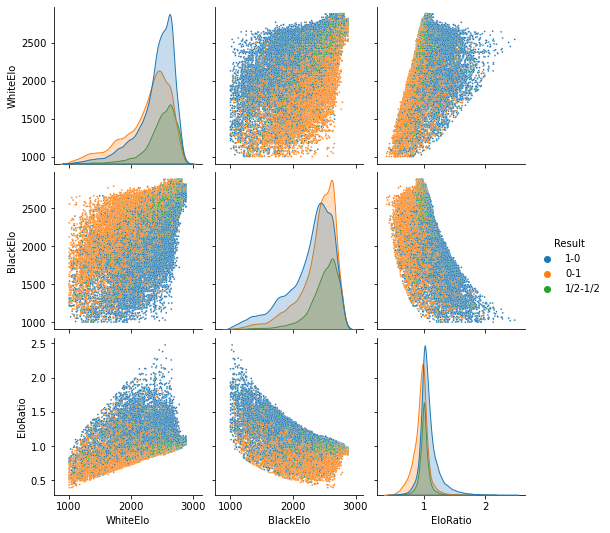

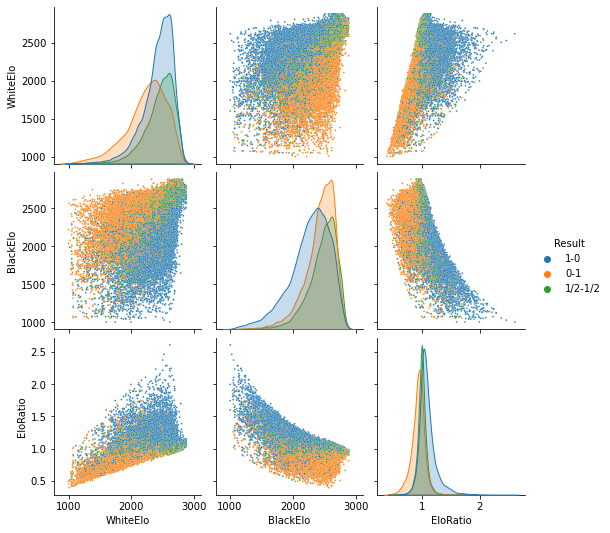

In [49]:
sns.pairplot(df_bz, vars=['WhiteElo', 'BlackElo',"EloRatio"], hue = "Result", plot_kws={"s": 3})#, markers=["o", "s"])
sns.pairplot(df_rd, vars=['WhiteElo', 'BlackElo',"EloRatio"], hue = "Result", plot_kws={"s": 3})#, markers=["o", "s"])


In [50]:
# Volvamos a ver los resultados:

display(df_bz.Result.value_counts(normalize=True))

display(df_rd.Result.value_counts(normalize=True))

1-0        0.447207
0-1        0.386249
1/2-1/2    0.166543
Name: Result, dtype: float64

1-0        0.410619
0-1        0.339957
1/2-1/2    0.249423
Name: Result, dtype: float64

In [51]:
display(df_bz.shape)
display(df_rd.shape)

(90571, 17)

(67632, 17)

In [52]:
# Como vamos a estar probando distintos arboles y distintos sets de datos,
# me voy a armar una función que reciba los sets "X" e "y", y 
# haga el split, optimización/train y test,
# devolviendo el arbol entrenado y los sets de train y test utilizados:

def Arbol(X, y):
    
    #Split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   random_state=0, 
                                   test_size=0.25, 
                                   shuffle=True, stratify=y)
    
    #Optimización
    arbol = tree.DecisionTreeClassifier()

    criterio=["gini", "entropy"]
    max_depth_range = np.arange(6, 9)
    min_samples_split_range = np.arange(2, 5)
    param_grid = dict(criterion = criterio, 
                     max_depth = max_depth_range,
                     min_samples_split = min_samples_split_range)


    folds = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

    grid_arbol = GridSearchCV(arbol, param_grid, cv = folds, scoring='f1_micro', n_jobs=-1)

    grid_arbol.fit(X_train, y_train)

    print(f"Los mejores parámetros del árbol son:\n{grid_arbol.best_params_}")
    
    #Testeo
    y_pred = grid_arbol.predict(X_test)
    
    # Performance
    c = confusion_matrix(y_test, y_pred) # mostramos la matriz de confusion
    plt.figure(figsize=(3  ,3))
    ax= plt.subplot()
    sns.heatmap(c, annot=True, fmt="d")
    ax.set_xlabel('Valores predecidos')
    ax.set_ylabel('Valores de test')
    ax.xaxis.set_ticklabels(['N', 'B', "T"])
    ax.yaxis.set_ticklabels(['N', 'B', "T"])
    ax.set_title('Matriz de Confusión')
    plt.show()

    #display(confusion_matrix(y_test, y_pred))
    display(f1_score(y_test, y_pred, average="micro"))
    print(f"accuracy: {accuracy_score(y_test, y_pred)}")
    
    #llamo a la funcion con una tupla donde se guarda todo
    return (grid_arbol, X_train, y_train, X_test, y_test) 
    


In [53]:
# Arranquemos viendo cómo se predicen los resultados para las rápidas que están bastante balanceadas las tres etiquetas:

features = ["WhiteElo", "BlackElo"]
X = df_rd[features]
y = df_rd.Result



Los mejores parámetros del árbol son:
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}


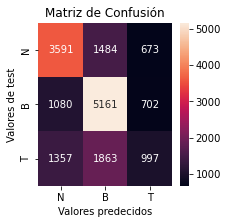

0.5765909628578187

accuracy: 0.5765909628578187


In [54]:

rd_elo = Arbol(X,y)

In [55]:
# Vamos con las dummies para los IDs
# Veamos primero cuantas dummies voy a crear:

blancas = len(df_rd.WhiteFideId.unique())


negras = len(df_rd.BlackFideId.unique())

print(f"crearemos {blancas} dummies de blancas y {negras} dummies de negras")
print(f"en total {blancas+negras} dummies menos 2, porque voy a hacer drop_first")

crearemos 8732 dummies de blancas y 8769 dummies de negras
en total 17501 dummies menos 2, porque voy a hacer drop_first


In [56]:
# Redefinamos el set de features, agregando ahora el ID:
X = df_rd[["WhiteElo", "BlackElo", "WhiteFideId", "BlackFideId"]]

# Las dummies las voy a crear sobre el set de features "X":
X = pd.get_dummies(X, columns=['WhiteFideId', 'BlackFideId'], drop_first=True)



In [57]:
X.shape

(67632, 17501)

In [58]:
X.head(1)


WhiteElo  BlackElo  WhiteFideId_100137  WhiteFideId_100340  \
0    2527.0    2835.0                   0                   0   

   WhiteFideId_101613  WhiteFideId_104213  WhiteFideId_105309  \
0                   0                   0                   0   

   WhiteFideId_107069  WhiteFideId_108049  WhiteFideId_110973  \
0                   0                   0                   0   

   WhiteFideId_112275  WhiteFideId_114987  WhiteFideId_115479  \
0                   0                   0                   0   

   WhiteFideId_116459  WhiteFideId_116807  WhiteFideId_117927  \
0                   0                   0                   0   

   WhiteFideId_118702  WhiteFideId_121576  WhiteFideId_133990  \
0                   0                   0                   0   

   WhiteFideId_159255  WhiteFideId_200018  WhiteFideId_200921  \
0                   0                   0                   0   

   WhiteFideId_200930  WhiteFideId_200999  WhiteFideId_201340  \
0                   0                   0                   0   

   WhiteFideId_201898  WhiteFideId_201910  WhiteFideId_202274  \
0                   0                   0                   0   

   WhiteFideId_202355  WhiteFideId_202789  WhiteFideId_203475  \
0                   0                   0                   0   

   WhiteFideId_203882  WhiteFideId_204099  WhiteFideId_204439  \
0                   0                   0                   0   

   WhiteFideId_205745  WhiteFideId_206199  WhiteFideId_208027  \
0                   0                   0                   0   

   WhiteFideId_208078  WhiteFideId_208310  WhiteFideId_215937  \
0                   0                   0                   0   

   WhiteFideId_228699  WhiteFideId_230804  WhiteFideId_233161  \
0                   0                   0                   0   

   WhiteFideId_233196  WhiteFideId_236543  WhiteFideId_237108  \
0                   0                   0                   0   

   WhiteFideId_237280  WhiteFideId_238430  WhiteFideId_238988  \
0                   0                   0                   0   

   WhiteFideId_240052  WhiteFideId_240990  WhiteFideId_251917  \
0                   0                   0                   0   

   WhiteFideId_254614  WhiteFideId_256382  WhiteFideId_260193  \
0                   0                   0                   0   

   WhiteFideId_263036  WhiteFideId_300012  WhiteFideId_300047  \
0                   0                   0                   0   

   WhiteFideId_300055  WhiteFideId_300071  WhiteFideId_300110  \
0                   0                   0                   0   

   WhiteFideId_300128  WhiteFideId_300179  WhiteFideId_300187  \
0                   0                   0                   0   

   WhiteFideId_300217  WhiteFideId_300306  WhiteFideId_300535  \
0                   0                   0                   0   

   WhiteFideId_300586  WhiteFideId_300594  WhiteFideId_300659  \
0                   0                   0                   0   

   WhiteFideId_300683  WhiteFideId_300756  WhiteFideId_300870  \
0                   0                   0                   0   

   WhiteFideId_300993  WhiteFideId_301116  WhiteFideId_301140  \
0                   0                   0                   0   

   WhiteFideId_301175  WhiteFideId_301183  WhiteFideId_301264  \
0                   0                   0                   0   

   WhiteFideId_301388  WhiteFideId_301477  WhiteFideId_301566  \
0                   0                   0                   0   

   WhiteFideId_301647  WhiteFideId_301663  WhiteFideId_301728  \
0                   0                   0                   0   

   WhiteFideId_301744  WhiteFideId_301795  WhiteFideId_301841  \
0                   0                   0                   0   

   WhiteFideId_302031  WhiteFideId_302066  WhiteFideId_302112  \
0                   0                   0                   0   

   WhiteFideId_302244  WhiteFideId_302295  WhiteFideId_302325  \
0       

In [59]:
#rd_id = Arbol(X,y)

Los tiempos de cálculo se empiezan a disparar, este grid tardó como 20 minutos en correr. Voy a ver cómo tratar con datos esparsos.

In [60]:
# Ahora veamos a las blitz:

features = ["WhiteElo", "BlackElo"]
X = df_bz[features]
y = df_bz.Result

Los mejores parámetros del árbol son:
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}


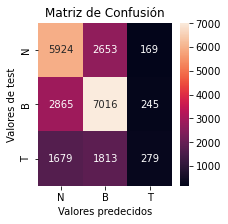

0.5838007331184031

accuracy: 0.5838007331184031


In [61]:

bz_elo = Arbol(X,y)

Para blitz le cuesta mucho predecir los empates.

Parece no haber mejoras con las dummies de IDs, pero puede ser un problema de datos muy esparsos.

Mientras averiguamos cómo se trabaja con matrices esparsas, podemos eliminar a dedo muchas dummies con un criterio del tipo: "Sólo quedan los IDs de los jugadores que más presencia tienen en el dataset".


In [ ]:
# empecemos tomando de las blitz a los jugadores con más de 100 partidas con blancas o negras
X = df_bz[["WhiteElo", "BlackElo", "WhiteFideId", "BlackFideId"]]
y = df_bz.Result

frecw = X.WhiteFideId.value_counts()
frecw.plot() #frecuencia de cada ID blanco
idw = frecw[frecw>100].index

frecb = X.BlackFideId.value_counts()
frecb.plot() #frecuencia de cada ID blanco
idb = frecb[frecb>100].index

In [63]:
print(len(idw))
print(len(idb))


ids = set(idw.append(idb))
print(len(ids))

# Son 155 jugadores, estas son las dummies que van a quedar (sin drop_first)

147
151
155


In [64]:


# tomemos los indices de estas partidas:
idt = X[(X.WhiteFideId.isin(ids)) & (X.BlackFideId.isin(ids))].index
print(len(idt))

# Tenemos 12646 partidas jugadas por estos jugadores

12646


In [65]:
# Veamos cuantas dummies voy a crear:

blancas = len(X.WhiteFideId.unique())


negras = len(X.BlackFideId.unique())

print(f"crearemos {blancas} dummies de blancas y {negras} dummies de negras")
print(f"en total {blancas+negras} dummies")


crearemos 7359 dummies de blancas y 7361 dummies de negras
en total 14720 dummies


In [66]:
# a las columnas originales las voy a nececitar para filtrar luego.

X = X.join(pd.get_dummies(X[['WhiteFideId', 'BlackFideId']].astype(str), prefix=["W", "B"], prefix_sep=''))

display(X.head(1))
display(X.shape)

WhiteElo  BlackElo  WhiteFideId  BlackFideId  W1000012  W1000020  \
2244    2835.0    2592.0      1503014      4170350         0         0   

      W1000063  W1000080  W10002324  W1000268  W1000403  W10005188  W1000551  \
2244         0         0          0         0         0          0         0   

      W10007709  W10012257  W1001302  W100137  W10014594  W1002473  W1002830  \
2244          0          0         0        0          0         0         0   

      W1002937  W100340  W1003720  W1003798  W1004670  W1004689  W1005308  \
2244         0        0         0         0         0         0         0   

      W1005561  W1005820  W1006088  W1007092  W1007238  W1007246  W1007904  \
2244         0         0         0         0         0         0         0   

      W1007998  W1008013  W1008439  W1008803  W1008870  W1009125  W1009311  \
2244         0         0         0         0         0         0         0   

      W1009451  W1009508  W1009818  W1011480  W101192  W1012827  W1012959  \
2244         0         0         0         0        0         0         0   

      W1013068  W1013114  W1013564  W1016873  W1017063  W1017292  W1018175  \
2244         0         0         0         0         0         0         0   

      W1018329  W1018400  W1018892  W1019465  W1019554  W1019708  W1019716  \
2244         0         0         0         0         0         0         0   

      W10200037  W10200207  W10200444  W10200525  W10200533  W10200622  \
2244          0          0          0          0          0          0   

      W10200649  W10200738  W10200835  W10200975  W10201203  W10201220  \
2244          0          0          0          0          0          0   

      W10201300  W10201351  W10201424  W10201858  W10201955  W10202587  \
2244          0          0          0          0          0          0   

      W10202730  W10203087  W10203133  W10203672  W10204067  W10204202  \
2244          0          0          0          0          0          0   

      W10204482  W1020650  W10207791  W10207929  W1020854  W1020986  \
2244          0         0          0          0         0         0   

      W10211187  W1021133  W1021150  W1021176  W10211888  W10212590  \
2244          0         0         0         0          0          0   

      W10212949  W10213040  W10213961  W10215026  W10215964  W10216200  \
2244          0          0          0          0          0          0   

      W10218564  W1021966  W10223886  W10224009  W10224181  W10224505  \
2244          0         0          0          0          0          0   

      W10226826  W10226869  W10230238  W10230467  W10231609  W102326  \
2244          0          0          0          0          0        0   

      W10233598  W10233830  W10233989  W10234713  W10239014  W1024027  \
2244          0          0          0          0          0         0   

      W1024205  W1025007  W1026356  W1026399  W102652  W1029525  W10300163  \
2244         0         0         0         0        0         0          0   

      W1030108  W1032283  W1032852  W1033476  W1033689  W1033697  W103519  \
2244         0         0         0         0         0         0        0   

      W103560  W1036432  W1038257  W1039784  W1039792  W1039830  W1040391  \
2244        0         0         0         0         0         0         0   

      W1040634  W1040650  W1041444  W104302  W1043587  W1046730  W1047558  \
2244         0         0         0        0         0         0         0   

      W1047990  W1048104  W1048112  W1048333  W1048503  W1050036  W1050265  \
2244         0         0         0         0         0         0         0   

      W1050729  W1051008  W105309  W1053531  W1053787  W1054163  W1054430  \
2244         0         0        0         0         0         0         0   

      W1054759  W1056115  W1057430  W1057472  W1057529  W1057928  W1058223  \
2244         0         0         0         0         0         0         0   

      W1058401  W10600043  W10600507

(90571, 14724)

In [67]:
# veamos en donde las dummies pasan de blancas a negras
X.iloc[:,7359:].head(1)

W9935258  W9937153  W9944591  W9953698  B1000012  B1000020  B1000063  \
2244         0         0         0         0         0         0         0   

      B1000080  B10002324  B1000268  B1000403  B1000551  B10006346  B10007709  \
2244         0          0         0         0         0          0          0   

      B10012257  B1001302  B100137  B10014594  B1002473  B1002830  B1002937  \
2244          0         0        0          0         0         0         0   

      B1003623  B1003720  B1004670  B1004689  B1004735  B1005308  B1005561  \
2244         0         0         0         0         0         0         0   

      B1005820  B1007092  B1007238  B1007246  B1007904  B1007998  B1008013  \
2244         0         0         0         0         0         0         0   

      B1008439  B1008803  B1008870  B1009125  B1009451  B1009508  B1011014  \
2244         0         0         0         0         0         0         0   

      B1011480  B1011634  B101192  B1012827  B1012959  B1013068  B1016873  \
2244         0         0        0         0         0         0         0   

      B1017063  B1017292  B1018175  B1018400  B1018892  B1019465  B1019554  \
2244         0         0         0         0         0         0         0   

      B1019708  B1019716  B10200037  B10200096  B10200207  B10200444  \
2244         0         0          0          0          0          0   

      B10200525  B10200533  B10200622  B10200649  B10200738  B10200835  \
2244          0          0          0          0          0          0   

      B10200975  B10201203  B10201220  B10201300  B10201351  B10201858  \
2244          0          0          0          0          0          0   

      B10201955  B10202587  B10203087  B10203133  B10204067  B10204482  \
2244          0          0          0          0          0          0   

      B1020650  B10207791  B10207929  B1020854  B1020986  B1021133  B1021150  \
2244         0          0          0         0         0         0         0   

      B1021176  B10211888  B10212175  B10212582  B10212590  B10212949  \
2244         0          0          0          0          0          0   

      B10213961  B10215026  B10216200  B10217193  B10218564  B1021966  \
2244          0          0          0          0          0         0   

      B10221166  B10222006  B10223886  B10224009  B10224181  B10224505  \
2244          0          0          0          0          0          0   

      B10226826  B10226869  B10227407  B10229230  B10230238  B10230467  \
2244          0          0          0          0          0          0   

      B10231609  B102326  B10233598  B10233830  B10233989  B10234713  \
2244          0        0          0          0          0          0   

      B10239014  B1024027  B1024205  B1024280  B1025007  B1026356  B1026399  \
2244          0         0         0         0         0         0         0   

      B102652  B1026968  B1029525  B10300163  B1030108  B1032283  B1032852  \
2244        0         0         0          0         0         0         0   

      B1033476  B1033689  B1033697  B1034219  B103519  B103560  B1036432  \
2244         0         0         0         0        0        0         0   

      B1038257  B1039784  B1039792  B1039830  B1040391  B1040634  B1040650  \
2244         0         0         0         0         0         0         0   

      B1041444  B104302  B1043587  B1046730  B1047230  B1047990  B1048104  \
2244         0        0         0         0         0         0         0   

      B1048112  B1048333  B1048503  B1050036  B1050265  B1050729  B1051008  \
2244         0         0         0         0         0         0         0   

      B1052063  B105309  B1053531  B1053787  B1054163  B1054430  B1054759  \
2244         0        0         0         0         0         0         0   

      B1056115  B1057430  B1057472  B1057529  B1057928  B1058223  B1058401  \
2244         0         0         0         0         0         0         0   

    

In [68]:
# Ahora eliminamos a todas las dummies de jugadores con menos de 100 partidas con blancas o negras
# Los ids que se quedan estan en el set "ids", pero tengo que agregarles la "W" o la "B" adelante.
def sumW(numero_id):
    return "W"+str(numero_id)

def sumB(numero_id):
    return "B"+str(numero_id)

idsW = set(map(sumW,ids))
print(len(idsW))

idsB = set(map(sumB,ids))
print(len(idsB))

IDS = set(idsW | idsB)

print(f"Me voy a quedar con: {len(IDS)} dummies (los 155 con blancas y negras)")

# Hago un set con los nombres de todas las dummies
ids_X = set(X.columns[4:])
print(f"dummies iniciales: {len(ids_X)}")


# Les saco a los 134 jugadores con mayor presencia:
ids_drp = ids_X - IDS
print(f"tenemos {len(ids_drp)} dummies para dropear")


# lo paso a lista y ordeno:
ids_drp = list(ids_drp)
ids_drp.sort()





155
155
Me voy a quedar con: 310 dummies (los 155 con blancas y negras)
dummies iniciales: 14720
tenemos 14410 dummies para dropear


In [69]:

# Ahora con esa lista dropeo en X:

X = X.drop(ids_drp, axis=1)
display(X.shape)
display(X.head(1))

(90571, 314)

WhiteElo  BlackElo  WhiteFideId  BlackFideId  W1039784  W10601457  \
2244    2835.0    2592.0      1503014      4170350         0          0   

      W110973  W1112635  W1118358  W11600454  W1170546  W12401137  W12539929  \
2244        0         0         0          0         0          0          0   

      W12573981  W13300474  W13300881  W13400363  W13400924  W13401319  \
2244          0          0          0          0          0          0   

      W13401378  W13401653  W13500139  W13502956  W13504398  W13601520  \
2244          0          0          0          0          0          0   

      W13601903  W13702661  W13900048  W14100010  W14101181  W14101513  \
2244          0          0          0          0          0          0   

      W14101602  W14102560  W14103320  W14105730  W14109336  W14109603  \
2244          0          0          0          0          0          0   

      W14110911  W14111330  W14112035  W14114038  W14117908  W14120828  \
2244          0          0          0          0          0          0   

      W14122286  W14123622  W14204118  W14508150  W1503014  W1710400  \
2244          0          0          0          0         1         0   

      W2000024  W2010011  W2012782  W2016192  W2020009  W2047640  W2088215  \
2244         0         0         0         0         0         0         0   

      W2205530  W2285525  W24101605  W24104272  W24112798  W24116068  \
2244         0         0          0          0          0          0   

      W24125890  W24126055  W24129100  W24130737  W24131423  W24133795  \
2244          0          0          0          0          0          0   

      W24174041  W24175439  W24183750  W24603295  W24651516  W24662402  \
2244          0          0          0          0          0          0   

      W25092340  W2803828  W2804344  W2805677  W2900084  W2902257  W2905540  \
2244          0         0         0         0         0         0         0   

      W309095  W310204  W3503240  W35093487  W409561  W4100107  W4101588  \
2244        0        0         0          0        0         0         0   

      W4102142  W4107012  W4108116  W4111990  W4113403  W4114060  W4116992  \
2244         0         0         0         0         0         0         0   

      W4118987  W4119150  W4119932  W4121830  W4123700  W4125029  W4126025  \
2244         0         0         0         0         0         0         0   

      W4127870  W4128125  W4129199  W4131002  W4138147  W4138716  W4140419  \
2244         0         0         0         0         0         0         0   

      W4142578  W4147103  W4147235  W4147332  W4149351  W4152956  W4153278  \
2244         0         0         0         0         0         0         0   

      W4157800  W4158814  W4160258  W4162722  W4166299  W4167570  W4168003  \
2244         0         0         0         0         0         0         0   

      W4168119  W4169786  W4170350  W4173708  W4180917  W4181751  W4182146  \
2244         0         0         0         0         0         0         0   

      W4189302  W4192770  W4194985  W4195752  W4197143  W44155573  W4641833  \
2244         0         0         0         0         0          0         0   

      W4675789  W5000017  W5007003  W5008123  W5015197  W5029465  W5058422  \
2244         0         0         0         0         0         0         0   

      W5202213  W603767  W608742  W623539  W6300545  W662399  W696358  \
2244         0        0        0        0         0        0        0   

      W703303  W8601283  W8602883  W8602980  W8603006  W8603820  W911925  \
2244        0         0         0         0         0         0        0   

      W9301348  B1039784  B10601457  B110973  B1112635  B1118358  B11600454  \
2244         0         0          0        0         0         0          0   

      B1170546  B12401137  B12539929  B12573981  B13300474  B13300881  \
2244         0          0          0          0          0          0   

      B13400363  B13400924  

In [70]:
# Y ahora tiro tambien las columnas de IDs:
X = X.drop(["WhiteFideId", "BlackFideId"], axis=1)
display(X.shape)
display(X.head(1))


(90571, 312)

WhiteElo  BlackElo  W1039784  W10601457  W110973  W1112635  W1118358  \
2244    2835.0    2592.0         0          0        0         0         0   

      W11600454  W1170546  W12401137  W12539929  W12573981  W13300474  \
2244          0         0          0          0          0          0   

      W13300881  W13400363  W13400924  W13401319  W13401378  W13401653  \
2244          0          0          0          0          0          0   

      W13500139  W13502956  W13504398  W13601520  W13601903  W13702661  \
2244          0          0          0          0          0          0   

      W13900048  W14100010  W14101181  W14101513  W14101602  W14102560  \
2244          0          0          0          0          0          0   

      W14103320  W14105730  W14109336  W14109603  W14110911  W14111330  \
2244          0          0          0          0          0          0   

      W14112035  W14114038  W14117908  W14120828  W14122286  W14123622  \
2244          0          0          0          0          0          0   

      W14204118  W14508150  W1503014  W1710400  W2000024  W2010011  W2012782  \
2244          0          0         1         0         0         0         0   

      W2016192  W2020009  W2047640  W2088215  W2205530  W2285525  W24101605  \
2244         0         0         0         0         0         0          0   

      W24104272  W24112798  W24116068  W24125890  W24126055  W24129100  \
2244          0          0          0          0          0          0   

      W24130737  W24131423  W24133795  W24174041  W24175439  W24183750  \
2244          0          0          0          0          0          0   

      W24603295  W24651516  W24662402  W25092340  W2803828  W2804344  \
2244          0          0          0          0         0         0   

      W2805677  W2900084  W2902257  W2905540  W309095  W310204  W3503240  \
2244         0         0         0         0        0        0         0   

      W35093487  W409561  W4100107  W4101588  W4102142  W4107012  W4108116  \
2244          0        0         0         0         0         0         0   

      W4111990  W4113403  W4114060  W4116992  W4118987  W4119150  W4119932  \
2244         0         0         0         0         0         0         0   

      W4121830  W4123700  W4125029  W4126025  W4127870  W4128125  W4129199  \
2244         0         0         0         0         0         0         0   

      W4131002  W4138147  W4138716  W4140419  W4142578  W4147103  W4147235  \
2244         0         0         0         0         0         0         0   

      W4147332  W4149351  W4152956  W4153278  W4157800  W4158814  W4160258  \
2244         0         0         0         0         0         0         0   

      W4162722  W4166299  W4167570  W4168003  W4168119  W4169786  W4170350  \
2244         0         0         0         0         0         0         0   

      W4173708  W4180917  W4181751  W4182146  W4189302  W4192770  W4194985  \
2244         0         0         0         0         0         0         0   

      W4195752  W4197143  W44155573  W4641833  W4675789  W5000017  W5007003  \
2244         0         0          0         0         0         0         0   

      W5008123  W5015197  W5029465  W5058422  W5202213  W603767  W608742  \
2244         0         0         0         0         0        0        0   

      W623539  W6300545  W662399  W696358  W703303  W8601283  W8602883  \
2244        0         0        0        0        0         0         0   

      W8602980  W8603006  W8603820  W911925  W9301348  B1039784  B10601457  \
2244         0         0         0        0         0         0          0   

      B110973  B1112635  B1118358  B11600454  B1170546  B12401137  B12539929  \
2244        0         0         0          0         0          0          0   

      B12573981  B13300474  B13300881  B13400363  B13400924  B13401319  \
2244          0          0          0          0          0          0   

      B1340137

<AxesSubplot:>

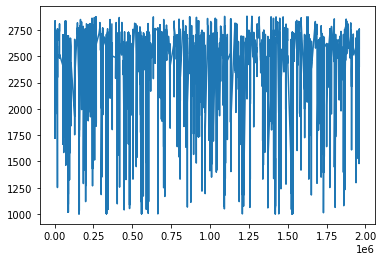

In [71]:
# Veamos como se distribuye el elo en blitz:
X.WhiteElo.plot()

<AxesSubplot:>

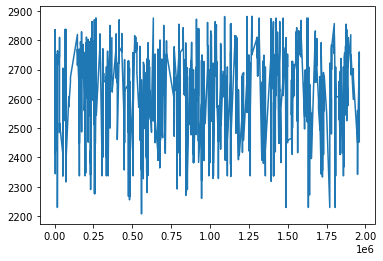

In [72]:
# Veamos como se distribuye el elo en blitz, para los jugadores que tienen mayor presencia:
X_d = X.loc[idt]
X_d.WhiteElo.plot()

Los mejores parámetros del árbol son:
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}


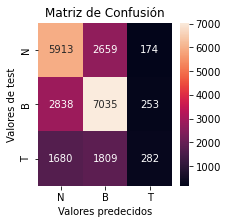

0.584286534469814

accuracy: 0.584286534469814


In [73]:

bz_id = Arbol(X,y)

In [87]:
# vamos a tunear xgb:
xgb = XGBClassifier(objective="multi:softmax", eval_metric="merror", seed=0, tree_method="approx", n_jobs=-1) # Vamos a usarlo como un histgb

l_rate = np.array([0.15,0.2])
n_est = np.array([300, 400])
max_d = np.array([2,3,4])

param_grid = dict(learning_rate = l_rate, 
                  n_estimators = n_est,
                  max_depth = max_d)
print(param_grid)

splits=2

folds = KFold(n_splits=splits, random_state=0, shuffle=True)

xgboosters = len(l_rate)*len(n_est)*len(max_d)*splits
arbolitos = (n_est.sum())*len(l_rate)*len(max_d)*splits

print(f"se van a entrenar {xgboosters} xgboosts")
print(f"se van a entrenar {arbolitos} árboles")


grid_xgb = GridSearchCV(xgb, param_grid, cv = folds, scoring='f1_micro', n_jobs=-1)

{'learning_rate': array([0.15, 0.2 ]), 'n_estimators': array([300, 400]), 'max_depth': array([2, 3, 4])}
se van a entrenar 24 xgboosts
se van a entrenar 8400 árboles


In [80]:
def xgb_target(valor):
    if valor=="1-0":
        return 0
    if valor=="0-1":
        return 1
    if valor=="1/2-1/2":
        return 2
    
y_xgb = pd.Series(list(map(xgb_target, y)))

In [88]:
inicio = time.time()
grid_xgb.fit(X, y_xgb)
final = time.time()
print(f"tiempo de optimización: {(final-inicio)/60} minutos")
print(f"se entrenan {np.around(arbolitos/(final-inicio),1)} árboles por segundo")

tiempo de optimización: 65.7405642747879 minutos
se entrenan 2.1 árboles por segundo


In [89]:
grid_xgb_results = pd.DataFrame(grid_xgb.cv_results_)
gd_xgb = grid_xgb_results.loc[:,["param_n_estimators", "param_max_depth", "param_learning_rate", "mean_test_score",	"std_test_score",	"rank_test_score"]].sort_values(by = "rank_test_score")
gd_xgb.set_index("rank_test_score", inplace=True)
gd_xgb

param_n_estimators param_max_depth param_learning_rate  \
rank_test_score                                                          
1                              300               2                0.15   
2                              400               2                0.15   
3                              400               2                 0.2   
4                              300               2                 0.2   
5                              300               3                 0.2   
6                              400               3                0.15   
7                              300               4                0.15   
8                              300               3                0.15   
9                              400               3                 0.2   
10                             400               4                0.15   
11                             300               4                 0.2   
12                             400               4                 0.2   

                 mean_test_score  std_test_score  
rank_test_score                                   
1                       0.589239        0.000347  
2                       0.589030        0.000159  
3                       0.589030        0.000292  
4                       0.588930        0.000347  
5                       0.588356        0.000634  
6                       0.588179        0.000546  
7                       0.588036        0.000888  
8                       0.588025        0.000656  
9                       0.587870        0.000678  
10                      0.587572        0.000866  
11                      0.587142        0.001009  
12                      0.586645        0.001087

In [ ]:
# tengo que tocar los parametros en la instancia del xgb,
# tree_method="hist", max_bin=7, etc...

In [ ]:

# me voy a armar una función que reciba los sets "X" e "y", y 
# haga el split, optimización/train y test para un xgb,
# devolviendo el modelo entrenado y los sets de train y test utilizados:

def XGB(X, y):
    
    def xgb_target(valor):
        if valor=="1-0":
            return 0
        if valor=="0-1":
            return 1
        if valor=="1/2-1/2":
            return 2
    
    y = pd.Series(list(map(xgb_target, y)))
    
    #Split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   random_state=0, 
                                   test_size=0.25, 
                                   shuffle=True, stratify=y)
    
    #Optimización
    xgb = XGBClassifier(objective="multi:softmax", eval_metric="merror", seed=0, tree_method="approx", n_jobs=-1) # Vamos a usarlo como un histgb

    l_rate = np.array([0.2])
    n_est = np.array([50])
    max_d = np.array([4])
    col_bytree = np.array([0.5,1])

    param_grid = dict(learning_rate = l_rate, 
                      n_estimators = n_est,
                      max_depth = max_d, 
                     colsample_bytree = col_bytree)
    print(param_grid)

    splits=2

    folds = KFold(n_splits=splits, random_state=0, shuffle=True)

    xgboosters = len(l_rate)*len(n_est)*len(max_d)*len(col_bytree)*splits
    arbolitos = (n_est.sum())*len(l_rate)*len(max_d)*len(col_bytree)*splits

    print(f"se van a entrenar {xgboosters} xgboosts")
    print(f"se van a entrenar {arbolitos} árboles")

    grid_xgb = GridSearchCV(xgb, param_grid, cv = folds, scoring='f1_micro', n_jobs=-1)

    
    inicio = time.time()
    grid_xgb.fit(X_train, y_train)
    final = time.time()
    print(f"tiempo de optimización: {(final-inicio)/60} minutos")
    print(f"se entrenan {np.around(arbolitos/(final-inicio),1)} árboles por segundo"
    print(f"Los mejores parámetros del árbol son:\n{grid_xgb.best_params_}")
    
    #Testeo
    y_pred = grid_xgb.predict(X_test)
    
    # Performance
    c = confusion_matrix(y_test, y_pred) # mostramos la matriz de confusion
    plt.figure(figsize=(3  ,3))
    ax= plt.subplot()
    sns.heatmap(c, annot=True, fmt="d")
    ax.set_xlabel('Valores predecidos')
    ax.set_ylabel('Valores de test')
    ax.xaxis.set_ticklabels(['N', 'B', "T"])
    ax.yaxis.set_ticklabels(['N', 'B', "T"])
    ax.set_title('Matriz de Confusión')
    plt.show()

    #display(confusion_matrix(y_test, y_pred))
    display(f1_score(y_test, y_pred, average="micro"))
    print(f"accuracy: {accuracy_score(y_test, y_pred)}")
    
    #llamo a la funcion con una tupla donde se guarda todo
    return (grid_xgb, X_train, y_train, X_test, y_test) 
    


In [ ]:
colsample_bytree